In [1]:
import numpy as np
import pandas as pd
import random
import string
import tracemalloc
from timeit import timeit
import matplotlib.pyplot as plt
import tqdm
from matplotlib import rc
from scipy.optimize import curve_fit
rc('font', family='serif', serif='Times New Roman')

### String Matching

#### Knuth–Morris–Pratt string-searching algorithm

In [2]:
#The prefix function for a pattern
def kmp_preprocess(pattern):
    p = [0] * len(pattern)
    for i in range(1, len(pattern)):
        j = p[i - 1]
        while j > 0 and pattern[i] != pattern[j]:
            j = p[j - 1]
        if pattern[i] == pattern[j]:
            p[i] = j + 1
    return p

In [3]:
#Knuth-Morris-Pratt matching algorithm
def kmp(pattern, text):
    if pattern == '':
        return
    p = kmp_preprocess(pattern)
    results = []
    j = 0
    for i, c in enumerate(text):
        while j > 0 and c != pattern[j]:
            j = p[j - 1]
        if c == pattern[j]:
            if j == len(pattern) - 1:
                results.append(i - j)
                j = p[j - 1]
            else:
                j += 1
    return results

In [4]:
#generating random pattern and text, length of pattern <= text
def generate_sequence(length):
    text = ''.join([np.random.choice(list(string.ascii_lowercase)) for i in range(length)])
    pattern = ''.join([np.random.choice(list(text)) for i in range(np.random.randint(length))])
    return (pattern,text)

In [5]:
#example of Knuth-Morris-Pratt algorithm
print (f"Occurrences of a Word \"algo\" within a main text String \"example of algorithm\":", 
       kmp('algorithm','example of algorithm'))

Occurrences of a Word "algo" within a main text String "example of algorithm": [11]


In [6]:
#experimental time and space measurement for text length n from 1 to 2000
#taking average time and space for 10 different input data for each n
experimental_kmp = []
for n in tqdm.tqdm(range(1, 1001)):
    current_n = {"n": n}
    times = []
    space = []
    for i in range(10):
        key = generate_sequence(n)
        times.append(timeit(stmt=f"kmp(key[0],key[1])", globals=globals(), number=1))
        tracemalloc.start()
        kmp(key[0],key[1])
        sp=[tracemalloc.get_traced_memory()[1]]
        tracemalloc.stop()
        space.append(sp)
    
    current_n['time']=np.asarray(times).mean()
    current_n['space']=np.asarray(space).mean()
    
    experimental_kmp.append(current_n)   

100%|██████████| 1000/1000 [03:00<00:00,  5.54it/s]


In [7]:
df = pd.DataFrame(experimental_kmp)
df.head(10)

,n,time,space
0,1,7.646000e-07,0.0
1,2,2.158100e-06,73.6
2,3,4.802400e-06,150.4
3,4,5.120200e-06,100.0
4,5,6.921900e-06,140.0
5,6,6.612000e-06,158.4
6,7,6.763600e-06,164.0
7,8,6.276800e-06,183.2
8,9,5.733400e-06,188.8
9,10,4.980400e-06,164.8


<Figure size 3000x2000 with 0 Axes>

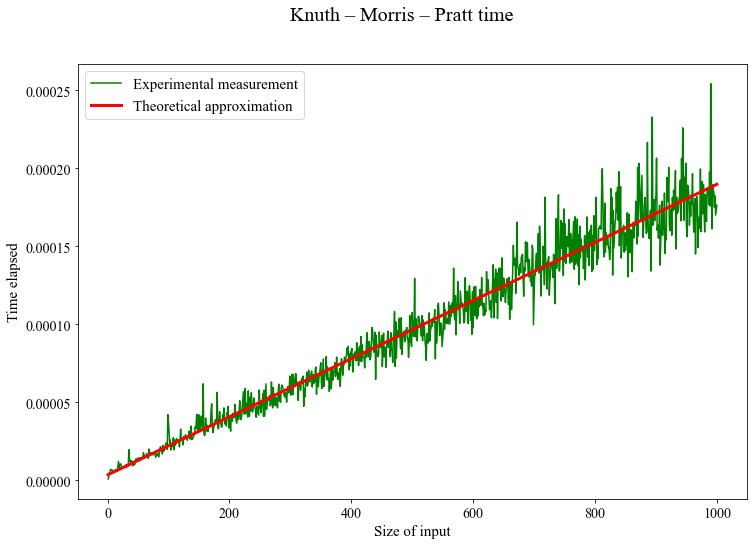

In [8]:
#visualization of results
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['time'], label='Experimental measurement',c='green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of input', fontsize=15)
coef= np.polyfit(x=df['n'], y=df['time'], deg=1)
theor = coef[0] * df['n'] + coef[1]
plt.plot(df['n'], theor, label='Theoretical approximation', c='red', linewidth = 3)
plt.suptitle('Knuth – Morris – Pratt time', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Knuth–Morris–Pratt time.png', format='png')

<Figure size 3000x2000 with 0 Axes>

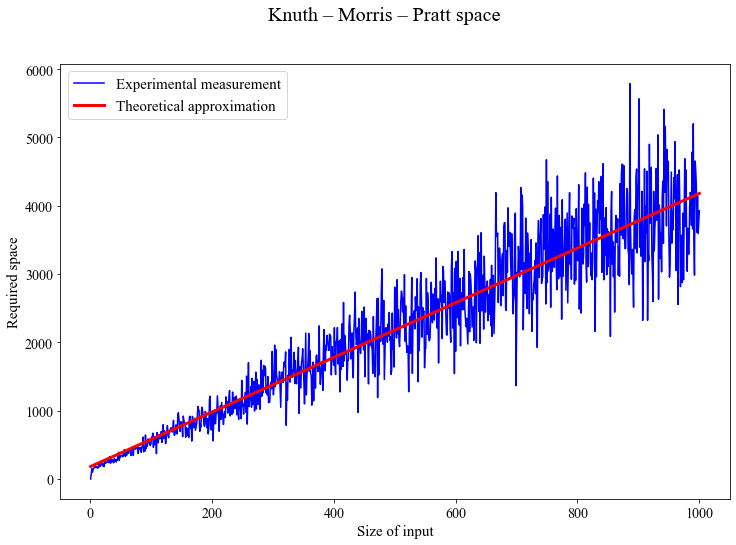

In [9]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['space'], label='Experimental measurement',c='blue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Required space', fontsize=15)
plt.xlabel('Size of input', fontsize=15)
coef= np.polyfit(x=df['n'], y=df['space'], deg=1)
theor = coef[0] * df['n'] + coef[1]
plt.plot(df['n'], theor, label='Theoretical approximation', c='red', linewidth = 3)
plt.suptitle('Knuth – Morris – Pratt space', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Knuth–Morris–Pratt space.png', format='png')

### Dynamic Programming

#### Longest common subsequence algorithm

In [10]:
#implementation of LCS, L returns the length of LCS of x[0..n-1] and y[0..m-1] 
def lcs_matrix(x, y):
    L = [[0]*(len(y)+1) for _ in range(len(x)+1)]
    for x_i,x_elem in enumerate(x):
        for y_i,y_elem in enumerate(y):
            if x_elem == y_elem:
                L[x_i][y_i] = L[x_i-1][y_i-1] + 1
            else:
                L[x_i][y_i] = max((L[x_i][y_i-1],L[x_i-1][y_i]))
    return L

In [11]:
#returning the result for LCS from lcs_matrix
def lcs(x, y):
    L = lcs_matrix(x, y)
    LCS = []
    x_i,y_i = len(x)-1,len(y)-1
    while x_i >= 0 and y_i >= 0:
        if x[x_i] == y[y_i]:
            LCS.append(x[x_i])
            x_i, y_i = x_i-1, y_i-1
        elif L[x_i-1][y_i] > L[x_i][y_i-1]:
            x_i -= 1
        else:
            y_i -= 1
    LCS.reverse()
    return ("".join(LCS))

In [12]:
#generating random pattern and text, length of pattern = m, length of text = n
def generate_sequence(n,m):
    text = ''.join([np.random.choice(list(string.ascii_lowercase)) for i in range(n)])
    pattern = ''.join([np.random.choice(list(text)) for i in range(m)])
    return (pattern,text)

In [13]:
#example of Longest common subsequence algorithm
k = generate_sequence(10,5)
print ("Subsequence:", k[0])
print ("Sequence:", k[1])
print ("Longest common subsequence:", lcs(k[0],k[1]))

Subsequence: bxxxw
Sequence: bgwbxbodxx
Longest common subsequence: bxxx


In [14]:
#experimental time and space measurement for LCS
experimental_lcs = []
for m,n in tqdm.tqdm(zip(range(1, 501), range(1,1001,2))):
    current_n = {"n": n}
    times = []
    space = []
    for i in range(10):
        key = generate_sequence(n,m)
        times.append(timeit(stmt=f"lcs(key[0],key[1])", globals=globals(), number=1))
        tracemalloc.start()
        lcs(key[0],key[1])
        sp=[tracemalloc.get_traced_memory()[1]]
        tracemalloc.stop()
        space.append(sp)
        
    current_n ['m'] = m
    current_n['time']=np.asarray(times).mean()
    current_n['space']=np.asarray(space).mean()
    
    experimental_lcs.append(current_n)

500it [20:16,  2.43s/it]


In [15]:
df = pd.DataFrame(experimental_lcs)
df.head(10)

,n,m,time,space
0,1,1,0.000006,408.0
1,3,2,0.000012,536.0
2,5,3,0.000020,632.0
3,7,4,0.000026,792.0
4,9,5,0.000027,952.0
5,11,6,0.000032,1144.0
6,13,7,0.000041,1368.0
7,15,8,0.000050,1688.0
8,17,9,0.000061,1976.0
9,19,10,0.000073,2296.0


In [16]:
# find f(X) values for theoretical approximation
def theoretical(Y, m, n):
    def complexity(m, n):
        return m*n
    length = []
    for m_, n_ in zip(m, n):
        length.append(m_ * n_)
    popt, pcov = curve_fit(complexity, length, Y)
    Y_theoretical = []
    for m_, n_ in zip(m, n):
        length_ = m_ * n_
        Y_theoretical.append(complexity(length_, *popt))
    return Y_theoretical

<Figure size 3000x2000 with 0 Axes>

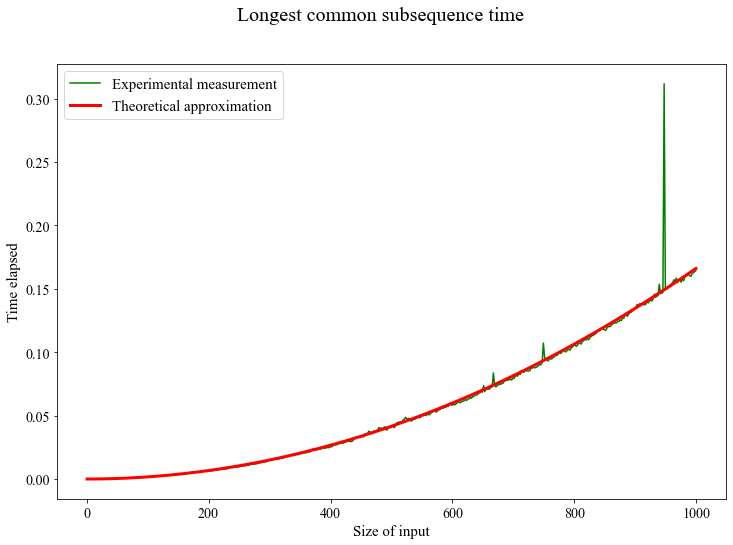

In [17]:
#plot the results obtained
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['time'], label='Experimental measurement',c='green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of input', fontsize=15)
plt.plot(df['n'], theoretical(df['time'], df['m'], df['n']), label='Theoretical approximation', c='red', linewidth = 3)
plt.suptitle('Longest common subsequence time', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Longest common subsequence time.png', format='png')

<Figure size 3000x2000 with 0 Axes>

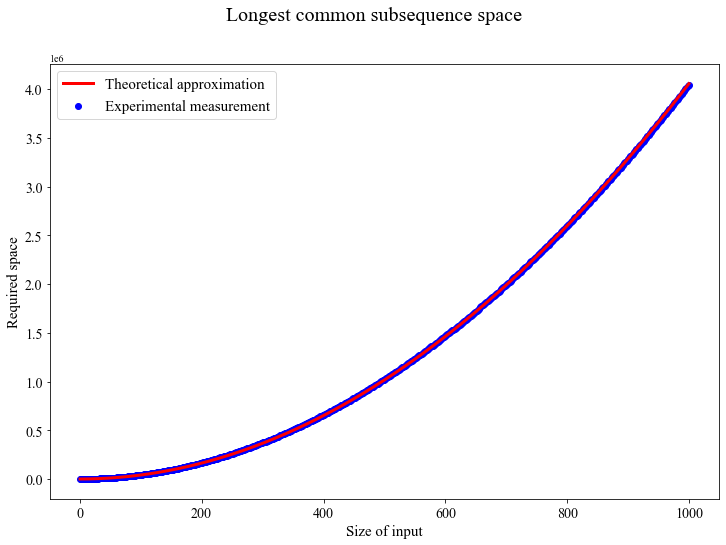

In [18]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.scatter(df['n'], df['space'], label='Experimental measurement',c='blue',linewidth = 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Required space', fontsize=15)
plt.xlabel('Size of input', fontsize=15)
plt.plot(df['n'], theoretical(df['space'], df['m'], df['n']), label='Theoretical approximation', c='red', linewidth = 3)
plt.suptitle('Longest common subsequence space', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Longest common subsequence space.png', format='png')